In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Hudzaifah Alqarani
## 2109106089
#### data set : https://www.kaggle.com/datasets/marquis03/plants-classification?select=test

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

### Directory Train dan Val

In [3]:
TRAIN_DIR ='/kaggle/input/plants-classification/train'
VAL_DIR ='/kaggle/input/plants-classification/val'
TEST_DIR ='/kaggle/input/plants-classification/test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255,
            validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

### Augmentasi Gambar
#### Train

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

#### Validation

In [6]:
val_datagen = ImageDataGenerator(
    rescale = 1.0/255.0
)

#### Test

In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1.0/255.0
)

### Membuat Flow From Direction
##### Membuat Generator Untuk Setiap Subset

#### Train

In [43]:
train_generator = train_datagen.flow_from_directory(
   TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 21000 images belonging to 30 classes.


#### Validation

In [44]:
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 30 classes.


#### Test

In [45]:
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 6000 images belonging to 30 classes.


### Model Sequential

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    #CNN (Feature Extraction)
    Conv2D(128, 3, 
           activation ='relu', 
           input_shape = [150, 150, 3]),
    MaxPooling2D(2,2),
    Conv2D(64, 3, activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    #DNN (Fully-Connected)
    Dense(64, activation = 'relu'),
    Dense(30, activation = 'softmax'),
    
])

model.compile(optimizer='Adam', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

#### Melatih Model

In [48]:
hasil = model.fit(train_generator, validation_data = val_generator, epochs = 10, verbose = 1)

Epoch 1/10
657/657 [==============================] - 1063s 2s/step - loss: 3.1148 - accuracy: 0.1001 - val_loss: 2.7497 - val_accuracy: 0.1837
Epoch 2/10
657/657 [==============================] - 1046s 2s/step - loss: 2.6381 - accuracy: 0.2177 - val_loss: 2.4312 - val_accuracy: 0.2723
Epoch 3/10
657/657 [==============================] - 1033s 2s/step - loss: 2.4932 - accuracy: 0.2592 - val_loss: 2.2848 - val_accuracy: 0.3087
Epoch 4/10
657/657 [==============================] - 1017s 2s/step - loss: 2.3580 - accuracy: 0.3014 - val_loss: 2.1299 - val_accuracy: 0.3667
Epoch 5/10
657/657 [==============================] - 1014s 2s/step - loss: 2.2474 - accuracy: 0.3350 - val_loss: 2.0314 - val_accuracy: 0.3880
Epoch 6/10
657/657 [==============================] - 1014s 2s/step - loss: 2.1736 - accuracy: 0.3580 - val_loss: 1.9150 - val_accuracy: 0.4373
Epoch 7/10
657/657 [==============================] - 1008s 2s/step - loss: 2.1046 - accuracy: 0.3762 - val_loss: 1.8560 - val_accuracy:

### Evaluasi Model

In [49]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Loss", loss)
print("Accuracy", accuracy)

188/188 [==============================] - 71s 377ms/step - loss: 1.8340 - accuracy: 0.4477
Loss 1.8340442180633545
Accuracy 0.4476666748523712


### Grafik Yang Menunjukkan Pergerakan Matriks Akurasi dan Loss

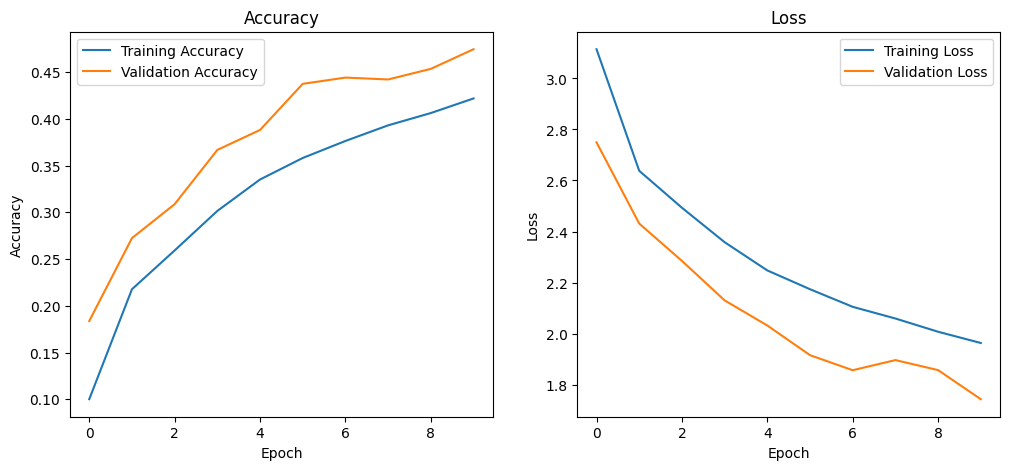

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hasil.history['accuracy'], label='Training Accuracy')
plt.plot(hasil.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hasil.history['loss'], label='Training Loss')
plt.plot(hasil.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()